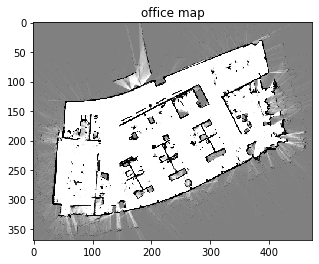

In [59]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('osrc_paper_windows.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.title('office map')
plt.show()

In [60]:
img.shape

(369, 473, 3)

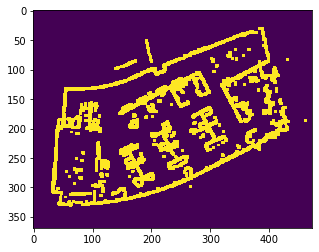

In [73]:
import numpy as np
res = cv2.inRange(img,np.array([0,0,0]),np.array([30,30,30]))
#res = res*100.0

kernel = np.ones((5,5),np.uint8)
res = cv2.dilate(res, kernel)
res = cv2.erode(res, kernel)
res = cv2.dilate(res, kernel)
plt.imshow(res)
plt.show()

In [74]:
res.shape

(369, 473)

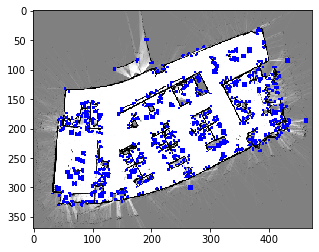

In [89]:
dst = cv2.cornerHarris(res*100,2,5,0.04)
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img_corner = img.copy()
img_corner[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img_corner)
plt.show()

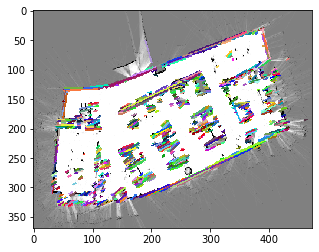

In [97]:
from random import random
minLineLength = 5
maxLineGap = 1
lines = cv2.HoughLinesP(res*100,1,np.pi/180,100,minLineLength,maxLineGap)
img2 = img.copy()
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(img2,(x1,y1),(x2,y2),(255*random(),255*random(),255*random()),2)

plt.imshow(img2)
plt.show()